In [459]:
import openpyxl
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 
plt.rcParams["axes.unicode_minus"] = False 
rc("font", family="Arial Unicode MS") 
get_ipython().run_line_magic("matplotlib", "inline")





In [460]:
data = pd.read_excel("코로나바이러스감염증-19_확진환자_발생현황_220509.xlsx", header=4)


In [461]:
data.drop(0, inplace=True)


In [462]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 1 to 841
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   일자       841 non-null    object
 1   계(명)     841 non-null    int64 
 2   국내발생(명)  841 non-null    object
 3   해외유입(명)  841 non-null    object
 4   사망(명)    841 non-null    object
dtypes: int64(1), object(4)
memory usage: 33.0+ KB


In [463]:
data

,일자,계(명),국내발생(명),해외유입(명),사망(명)
1,2020-01-20 00:00:00,1,-,1,-
2,2020-01-21 00:00:00,0,-,-,-
3,2020-01-22 00:00:00,0,-,-,-
4,2020-01-23 00:00:00,0,-,-,-
5,2020-01-24 00:00:00,1,-,1,-
...,...,...,...,...,...
837,2022-05-05 00:00:00,42291,42268,23,79
838,2022-05-06 00:00:00,26714,26686,28,48
839,2022-05-07 00:00:00,39600,39574,26,83
840,2022-05-08 00:00:00,40064,40048,16,71


In [464]:
data.drop([1,2,841], inplace=True)

In [465]:
data['일자'].replace({' 00:00:00':''}, inplace=True)

In [466]:
data.rename(columns={'일자':'date'}, inplace=True)

In [467]:
data

,date,계(명),국내발생(명),해외유입(명),사망(명)
3,2020-01-22,0,-,-,-
4,2020-01-23,0,-,-,-
5,2020-01-24,1,-,1,-
6,2020-01-25,0,-,-,-
7,2020-01-26,1,-,1,-
...,...,...,...,...,...
836,2022-05-04,49055,49026,29,72
837,2022-05-05,42291,42268,23,79
838,2022-05-06,26714,26686,28,48
839,2022-05-07,39600,39574,26,83


In [468]:
data['계(명)'].replace({'-':'0'}, inplace=True)
data['국내발생(명)'].replace({'-':'0'}, inplace=True)
data['해외유입(명)'].replace({'-':'0'}, inplace=True)
data['사망(명)'].replace({'-':'0'}, inplace=True)

In [469]:
data.set_index(keys=['date'],inplace=True)

In [470]:
data

,계(명),국내발생(명),해외유입(명),사망(명)
date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,1,0,1,0
2020-01-25,0,0,0,0
2020-01-26,1,0,1,0
...,...,...,...,...
2022-05-04,49055,49026,29,72
2022-05-05,42291,42268,23,79
2022-05-06,26714,26686,28,48


---

In [471]:
data2 = pd.read_excel("covid_data.xlsx", header=0)


In [472]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       838 non-null    datetime64[ns]
 1   total_cases                838 non-null    int64         
 2   new_cases_smoothed         832 non-null    float64       
 3   total_deaths               809 non-null    float64       
 4   new_deaths_smoothed        804 non-null    float64       
 5   icu_patients               767 non-null    float64       
 6   total_vaccinations         437 non-null    float64       
 7   people_vaccinated          437 non-null    float64       
 8   people_fully_vaccinated    437 non-null    float64       
 9   total_boosters             433 non-null    float64       
 10  new_vaccinations_smoothed  436 non-null    float64       
 11  stringency_index           831 non-null    float64       
dtypes: datet

In [473]:
data2

,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,icu_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations_smoothed,stringency_index
0,2020-01-22,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2020-01-23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2020-01-24,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2020-01-25,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2020-01-26,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
833,2022-05-04,17438068,50206.000,23158.0,98.857,NaN,123823568.0,45035707.0,44552151.0,35751870.0,171751.0,NaN
834,2022-05-05,17464782,38595.143,23206.0,68.857,NaN,123827205.0,45035755.0,44552199.0,35755411.0,141965.0,NaN
835,2022-05-06,17504334,38065.143,23289.0,70.714,NaN,124081671.0,45037744.0,44554769.0,36005324.0,121894.0,NaN
836,2022-05-07,17544398,38392.714,23360.0,69.286,NaN,124131520.0,45038345.0,44555512.0,36053829.0,117082.0,NaN


In [474]:
data2.set_index(keys=['date'],inplace=True)
data2.fillna(0, inplace=True)

In [475]:
data2

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,icu_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations_smoothed,stringency_index
date,,,,,,,,,,,
2020-01-22,1,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,1,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,2,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,2,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,3,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-04,17438068,50206.000,23158.0,98.857,0.0,123823568.0,45035707.0,44552151.0,35751870.0,171751.0,0.0
2022-05-05,17464782,38595.143,23206.0,68.857,0.0,123827205.0,45035755.0,44552199.0,35755411.0,141965.0,0.0
2022-05-06,17504334,38065.143,23289.0,70.714,0.0,124081671.0,45037744.0,44554769.0,36005324.0,121894.0,0.0


In [476]:
data_all=pd.concat([data, data2], axis=1)

In [477]:
data_all['국내발생(명)']=pd.to_numeric(data_all['국내발생(명)'])
data_all['해외유입(명)']=pd.to_numeric(data_all['해외유입(명)'])
data_all['사망(명)']=pd.to_numeric(data_all['사망(명)'])

In [478]:
# stringency_index: 엄격성 지수
# icu_patient 중환자

<AxesSubplot:>

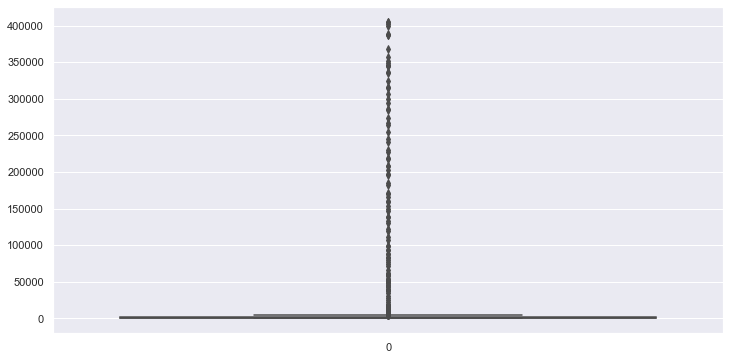

In [479]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_selected.iloc[:,0])

<AxesSubplot:>

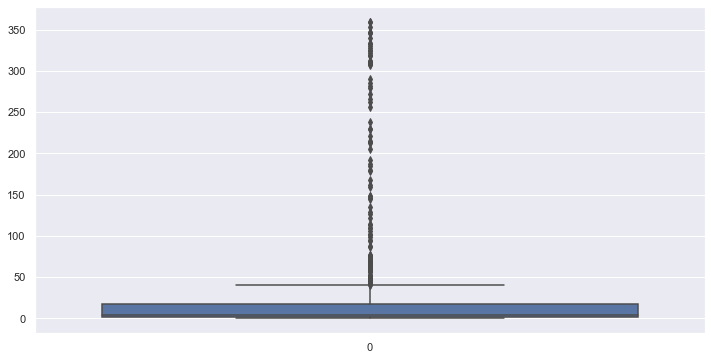

In [480]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_selected.iloc[:,1])


<AxesSubplot:>

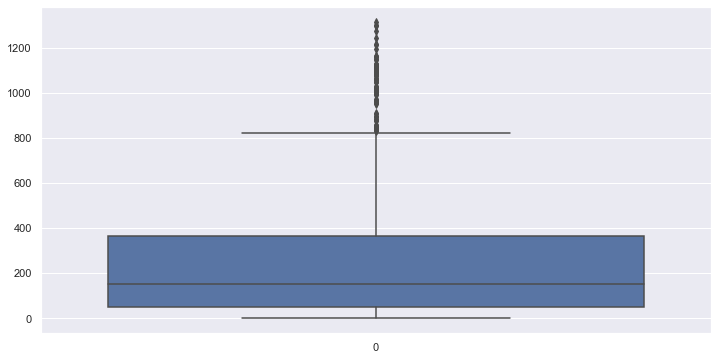

In [481]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_selected.iloc[:,2])


<AxesSubplot:>

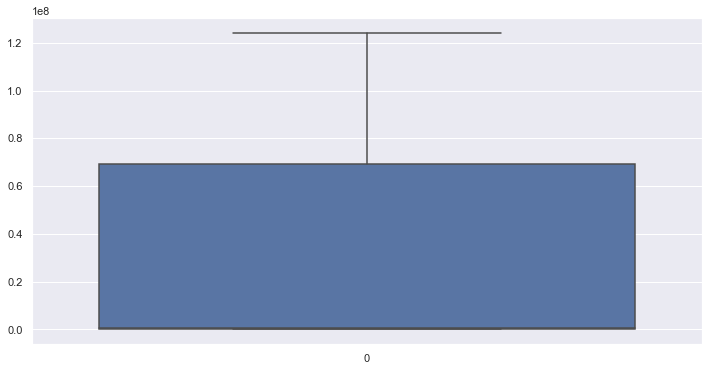

In [482]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_selected.iloc[:,3])

<AxesSubplot:>

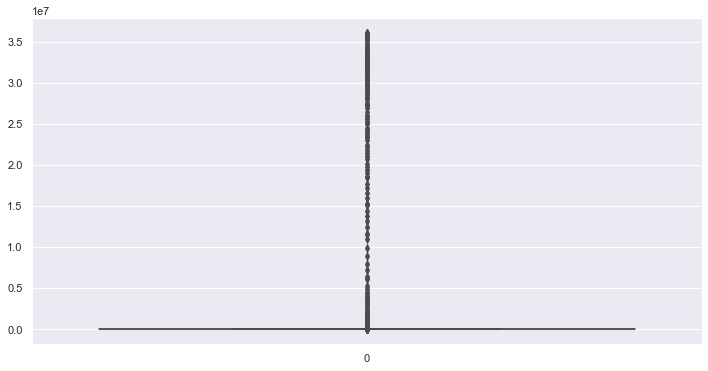

In [483]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_selected.iloc[:,4])

<AxesSubplot:>

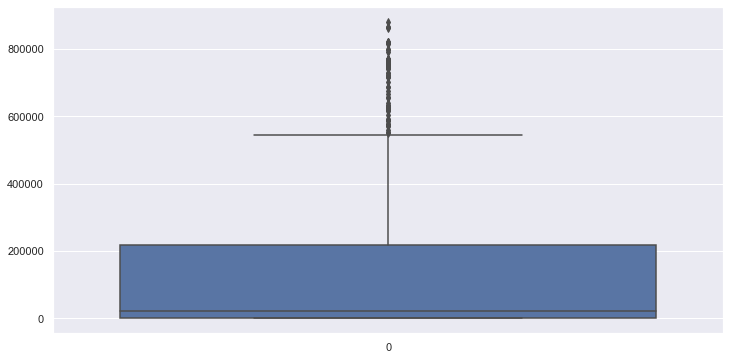

In [484]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_selected.iloc[:,5])

<AxesSubplot:>

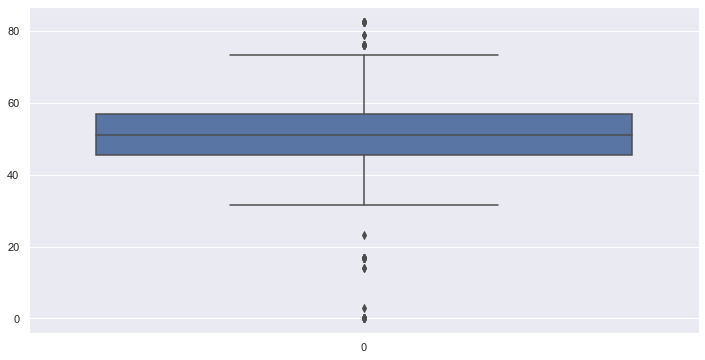

In [485]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_selected.iloc[:,6])

In [486]:

corr_mat = data_all.corr().round(1)
corr_mat

,계(명),국내발생(명),해외유입(명),사망(명),total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,icu_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations_smoothed,stringency_index
계(명),1.0,1.0,0.1,0.9,0.6,1.0,0.6,0.9,0.7,0.6,0.5,0.5,0.7,-0.1,-0.2
국내발생(명),1.0,1.0,0.1,0.9,0.6,1.0,0.6,0.9,0.7,0.6,0.5,0.5,0.7,-0.1,-0.2
해외유입(명),0.1,0.1,1.0,0.1,0.0,0.1,0.3,0.1,0.4,0.5,0.5,0.5,0.5,0.3,-0.0
사망(명),0.9,0.9,0.1,1.0,0.8,0.9,0.8,1.0,0.8,0.7,0.6,0.6,0.8,-0.0,-0.3
total_cases,0.6,0.6,0.0,0.8,1.0,0.7,1.0,0.8,0.6,0.6,0.5,0.6,0.8,-0.1,-0.5
new_cases_smoothed,1.0,1.0,0.1,0.9,0.7,1.0,0.7,0.9,0.7,0.6,0.5,0.5,0.7,-0.1,-0.3
total_deaths,0.6,0.6,0.3,0.8,1.0,0.7,1.0,0.8,0.7,0.8,0.7,0.7,0.9,0.1,-0.5
new_deaths_smoothed,0.9,0.9,0.1,1.0,0.8,0.9,0.8,1.0,0.8,0.7,0.6,0.6,0.8,-0.0,-0.3
icu_patients,0.7,0.7,0.4,0.8,0.6,0.7,0.7,0.8,1.0,0.8,0.8,0.8,0.7,0.4,-0.3
total_vaccinations,0.6,0.6,0.5,0.7,0.6,0.6,0.8,0.7,0.8,1.0,1.0,1.0,0.9,0.5,-0.5


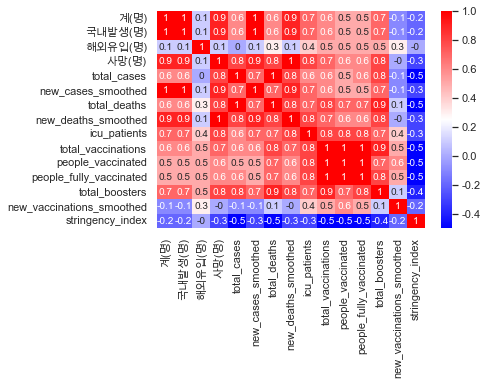

In [487]:
sns.heatmap(data = corr_mat, annot=True, cmap='bwr');

In [488]:
data_selected=data_all.iloc[:,4:]

In [ ]:
## 해외유입 넣기

In [489]:
data_selected


,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,icu_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations_smoothed,stringency_index
date,,,,,,,,,,,
2020-01-22,1,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,1,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,2,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,2,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,3,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-04,17438068,50206.000,23158.0,98.857,0.0,123823568.0,45035707.0,44552151.0,35751870.0,171751.0,0.0
2022-05-05,17464782,38595.143,23206.0,68.857,0.0,123827205.0,45035755.0,44552199.0,35755411.0,141965.0,0.0
2022-05-06,17504334,38065.143,23289.0,70.714,0.0,124081671.0,45037744.0,44554769.0,36005324.0,121894.0,0.0


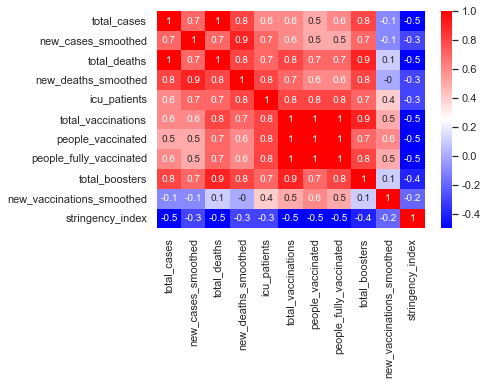

In [490]:

corr_mat = data_selected.corr().round(1)
sns.heatmap(data = corr_mat, annot=True, cmap='bwr');

In [491]:
data_selected=data_selected.iloc[:,[1,3,4,5,8,9,10]] #total_cases, total_deaths, people_vaccinated, people_fully_vaccinated

In [492]:
data_selected.columns

Index(['new_cases_smoothed', 'new_deaths_smoothed', 'icu_patients',
       'total_vaccinations', 'total_boosters', 'new_vaccinations_smoothed',
       'stringency_index'],
      dtype='object')

---

## 1. StandardScaler, PCA, LinearRegression

In [493]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data_selected.drop('new_deaths_smoothed', axis=1)
y = data_selected['new_deaths_smoothed']



In [494]:
SS = StandardScaler()
SS.fit(X)

X_ss =  SS.transform(X)
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2, random_state=13)




In [502]:
def get_pca_data(ss_data, n_components=2):
    pca =PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [503]:
CORONA_pca, pca = get_pca_data(X_train, n_components=2)
CORONA_pca.shape

(670, 2)

In [504]:
train_score = pca.transform(X_train)
test_score = pca.transform(X_test)


In [505]:
pca.explained_variance_ratio_ #eigen vector

array([0.58084691, 0.19437041])

In [506]:
def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_'+str(n) for n in range(pca.components_.shape[0])]
    return pd.DataFrame(pca_data, columns=cols)

In [507]:
lr = LinearRegression()

In [508]:
lr.fit(train_score, y_train)
pred_tr = lr.predict(train_score)
pred_test = lr.predict(test_score)



In [509]:
lr.coef_

array([ 29.90524115, -24.12555731])

In [510]:
from sklearn.metrics import mean_squared_error
import numpy as np



rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE train : ', rmse_tr)
print('RMSE test : ', rmse_test)

RMSE train :  25.214557753661076
RMSE test :  24.932210385643444


In [511]:
# r- squred
from sklearn.metrics import r2_score

r2_score(y_test, pred_test)
# https://runebook.dev/ko/docs/scikit_learn/modules/generated/sklearn.metrics.r2_score

0.8287244807749834

In [529]:

r2_score(y_train, pred_tr)

0.859926005429372

---

In [512]:
# estimators= [
#     ('scaler',StandardScaler()), 
#     ('pca',PCA(n_components=2)), 
#     ('linreg',LinearRegression())
# ]

# pipe= Pipeline(estimators)


In [513]:
# pipe.fit(X_train, y_train)

In [514]:
# from sklearn.metrics import mean_squared_error
# import numpy as np

# pred_tr = pipe.predict(X_train)
# pred_test = pipe.predict(X_test)

# rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
# rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

# print('RMSE train : ', rmse_tr)
# print('RMSE test : ', rmse_test)

In [543]:
pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(pred_test).reset_index(drop=True)],  axis=1, ignore_index=True)

,0,1
0,5.857,4.685029
1,2.857,2.323464
2,0.714,2.020417
3,0.000,10.537453
4,10.143,5.471153
...,...,...
163,1.571,5.212587
164,7.429,2.416494
165,2.429,3.741510
166,1.857,3.532401


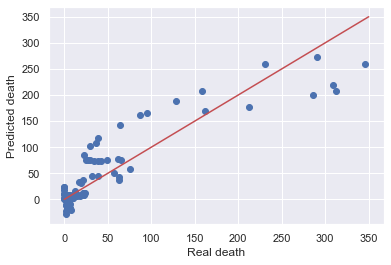

In [516]:
plt.scatter(y_test, pred_test)
plt.xlabel('Real death')
plt.ylabel('Predicted death')
plt.plot([0,350], [0,350], 'r')
plt.show()

In [517]:
# np.asarray(X_train)

In [518]:
import statsmodels.api as sm

lm = sm.OLS(y_train, np.asarray(X_train)).fit() #Adj. R-squared (uncentered):	0.795
lm.summary() #'new_cases_smoothed', 'icu_patients','total_vaccinations', 'total_boosters', 'new_vaccinations_smoothed','stringency_index'

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     new_deaths_smoothed   R-squared (uncentered):                   0.797
Model:                             OLS   Adj. R-squared (uncentered):              0.795
Method:                  Least Squares   F-statistic:                              433.5
Date:                 Tue, 10 May 2022   Prob (F-statistic):                   8.15e-226
Time:                         14:38:11   Log-Likelihood:                         -3292.7
No. Observations:                  670   AIC:                                      6597.
Df Residuals:                      664   BIC:                                      6624.
Df Model:                            6                                                  
Covariance Type:             nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            38.0464      2.288     16.629      0.000      33.554      42.539
x2            28.4002      2.796     10.157      0.000      22.910      33.891
x3           -11.5364      4.439     -2.599      0.010     -20.253      -2.820
x4            12.5886      3.633      3.465      0.001       5.455      19.723
x5            -5.3524      2.022     -2.647      0.008      -9.322      -1.383
x6            -5.1236      1.479     -3.463      0.001      -8.028      -2.219
==============================================================================
Omnibus:                      124.731   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2456.823
Skew:                           0.057   Prob(JB):                         0.00
Kurtosis:                      12.380   Cond. No.                         8.52
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

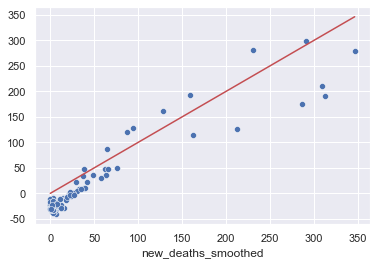

In [519]:
pred = lm.predict(np.asarray(X_test)) #test data로 성능 확인

sns.scatterplot(x=y_test, y = pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')

## model2 변수선택법(stepwise)

---